QUESTION 1

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:




data = pd.ExcelFile("C:\\Users\\ADMIN\\Desktop\\PYDATA\\HR_Analytics_dataset.xlsx")




In [73]:

print("Sheet names:", data.sheet_names)

all_sheets = {sheet_name: data.parse(sheet_name) for sheet_name in data.sheet_names}

for sheet_name, data in all_sheets.items():
    print(f"\nSheet name: {sheet_name}")
    print(data)

Sheet names: ['Harvesters Performance Data', 'Scoring Table', 'Outcome Table', 'Projected production data', 'Physical and System data']

Sheet name: Harvesters Performance Data
     Employee ID     Week  Speed of Harvest  Quality of Harvest  Absenteeism
0           E001   Week 1               869                  30            6
1           E002   Week 1              1935                   9           12
2           E003   Week 1               925                  13            1
3           E004   Week 1               522                  16            8
4           E005   Week 1              1943                   7            5
...          ...      ...               ...                 ...          ...
2595        E046  Week 52              1257                   5           12
2596        E047  Week 52               379                   2           13
2597        E048  Week 52              1899                  13            4
2598        E049  Week 52              1513          

In [74]:
base_data =all_sheets['Harvesters Performance Data']
print(base_data.head)

<bound method NDFrame.head of      Employee ID     Week  Speed of Harvest  Quality of Harvest  Absenteeism
0           E001   Week 1               869                  30            6
1           E002   Week 1              1935                   9           12
2           E003   Week 1               925                  13            1
3           E004   Week 1               522                  16            8
4           E005   Week 1              1943                   7            5
...          ...      ...               ...                 ...          ...
2595        E046  Week 52              1257                   5           12
2596        E047  Week 52               379                   2           13
2597        E048  Week 52              1899                  13            4
2598        E049  Week 52              1513                  12            2
2599        E050  Week 52              1808                  26            6

[2600 rows x 5 columns]>


In [75]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Employee ID         2600 non-null   object
 1   Week                2600 non-null   object
 2   Speed of Harvest    2600 non-null   int64 
 3   Quality of Harvest  2600 non-null   int64 
 4   Absenteeism         2600 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 101.7+ KB


In [ ]:
missing_values = base_data.isnull().sum()

print(missing_values)

Employee ID           0
Week                  0
Speed of Harvest      0
Quality of Harvest    0
Absenteeism           0
dtype: int64


In [78]:

weekly_avg = base_data.groupby('Employee ID').agg({'Speed of Harvest': 'mean', 'Quality of Harvest': 'mean'}).reset_index()

speed_scoring = {
    'low': 1,
    'medium': 2,
    'high': 3
}

quality_scoring = {
    'poor': 1,
    'average': 2,
    'excellent': 3
}

def categorize_and_assign_score(row):
    # Categorize speed
    if row['Speed of Harvest'] < 5:
        speed_category = 'low'
    elif row['Speed of Harvest'] < 10:
        speed_category = 'medium'
    else:
        speed_category = 'high'
    
    # Categorize quality
    if row['Quality of Harvest'] < 5:
        quality_category = 'poor'
    elif row['Quality of Harvest'] < 10:
        quality_category = 'average'
    else:
        quality_category = 'excellent'
    
    # Assign scores
    speed_score = speed_scoring[speed_category]
    quality_score = quality_scoring[quality_category]
    overall_score = (speed_score + quality_score) / 2
    return overall_score


weekly_avg['Overall_Performance_Score'] = weekly_avg.apply(categorize_and_assign_score, axis=1)


print(weekly_avg)

   Employee ID  Speed of Harvest  Quality of Harvest  \
0         E001        949.653846           15.980769   
1         E002       1021.519231           14.711538   
2         E003       1106.865385           15.884615   
3         E004       1086.519231           15.423077   
4         E005       1123.865385           16.980769   
5         E006       1007.596154           16.192308   
6         E007       1084.326923           17.384615   
7         E008        881.346154           13.961538   
8         E009       1080.826923           13.557692   
9         E010        987.884615           15.365385   
10        E011        958.807692           13.557692   
11        E012        926.653846           14.057692   
12        E013       1059.519231           15.557692   
13        E014       1063.346154           14.519231   
14        E015       1157.076923           15.019231   
15        E016       1085.615385           15.192308   
16        E017       1031.384615           13.25

In [89]:
base_data =all_sheets['Outcome Table']
print(base_data.head)

<bound method NDFrame.head of    Speed score  Quality Score                Outcome
0          1.0            1.0       Contract Renewed
1          0.8            1.0       Contract Renewed
2          0.6            1.0  Contract Under Review
3          1.0            0.8       Contract Renewed
4          0.8            0.8  Contract Under Review
5          0.6            0.8    Contract Terminated
6          1.0            0.6  Contract Under Review
7          0.8            0.6    Contract Terminated
8          0.6            0.6    Contract Terminated>


In [ ]:


base_data = pd.read_excel("C:\\Users\\ADMIN\\Desktop\\PYDATA\\HR_Analytics_dataset.xlsx", sheet_name='Harvesters Performance Data')
outcome_table = pd.read_excel("C:\\Users\\ADMIN\\Desktop\\PYDATA\\HR_Analytics_dataset.xlsx", sheet_name='Outcome Table')

base_data.columns = base_data.columns.str.strip()
outcome_table.columns
print(base_data.head())
print(outcome_table.head())

weekly_avg = base_data.groupby('Employee ID').agg({'Speed of Harvest': 'mean', 'Quality of Harvest': 'mean'}).reset_index()


speed_scoring = {
    'low': 0.6,
    'medium': 0.8,
    'high': 1.0
}

quality_scoring = {
    'poor': 0.6,
    'average': 0.8,
    'excellent': 1.0
}


def categorize_and_assign_score(row):
    # Categorize speed
    if row['Speed of Harvest'] < 5:
        speed_category = 'low'
    elif row['Speed of Harvest'] < 10:
        speed_category = 'medium'
    else:
        speed_category = 'high'
    
    # Categorize quality
    if row['Quality of Harvest'] < 5:
        quality_category = 'poor'
    elif row['Quality of Harvest'] < 10:
        quality_category = 'average'
    else:
        quality_category = 'excellent'
    
    # Assign scores
    speed_score = speed_scoring[speed_category]
    quality_score = quality_scoring[quality_category]
    return speed_score, quality_score

weekly_avg[['Speed score', 'Quality Score']] = weekly_avg.apply(lambda row: pd.Series(categorize_and_assign_score(row)), axis=1)

merged_data = pd.merge(weekly_avg, outcome_table, on=['Speed score', 'Quality Score'], how='left')


print(merged_data)

  Employee ID    Week  Speed of Harvest  Quality of Harvest  Absenteeism
0        E001  Week 1               869                  30            6
1        E002  Week 1              1935                   9           12
2        E003  Week 1               925                  13            1
3        E004  Week 1               522                  16            8
4        E005  Week 1              1943                   7            5
   Speed score  Quality Score                Outcome
0          1.0            1.0       Contract Renewed
1          0.8            1.0       Contract Renewed
2          0.6            1.0  Contract Under Review
3          1.0            0.8       Contract Renewed
4          0.8            0.8  Contract Under Review
   Employee ID  Speed of Harvest  Quality of Harvest  Speed score  \
0         E001        949.653846           15.980769          1.0   
1         E002       1021.519231           14.711538          1.0   
2         E003       1106.865385     

In [ ]:
import pandas as pd
from openpyxl import Workbook
from openpyxl.styles import PatternFill
from openpyxl.formatting.rule import ColorScaleRule, DataBarRule
from openpyxl.utils.dataframe import dataframe_to_rows

file_path = "C:\\Users\\ADMIN\\Desktop\\PYDATA\\HR_Analytics_dataset.xlsx"
base_data = pd.read_excel(file_path, sheet_name='Harvesters Performance Data')

weekly_avg = base_data.groupby('Employee ID').agg({
    'Speed of Harvest': 'mean',
    'Quality of Harvest': 'mean',
    'Absenteeism': 'mean'
}).reset_index()

speed_scoring = {
    'low': 1,
    'medium': 2,
    'high': 3
}

quality_scoring = {
    'poor': 1,
    'average': 2,
    'excellent': 3
}

def categorize_and_assign_score(row):
    # Categorize speed
    if row['Speed of Harvest'] < 5:
        speed_category = 'low'
    elif row['Speed of Harvest'] < 10:
        speed_category = 'medium'
    else:
        speed_category = 'high'
    
    # Categorize quality
    if row['Quality of Harvest'] < 5:
        quality_category = 'poor'
    elif row['Quality of Harvest'] < 10:
        quality_category = 'average'
    else:
        quality_category = 'excellent'
    
    # Assign scores
    speed_score = speed_scoring[speed_category]
    quality_score = quality_scoring[quality_category]
    overall_score = (speed_score + quality_score) / 2
    return overall_score


weekly_avg['Overall_Performance_Score'] = weekly_avg.apply(categorize_and_assign_score, axis=1)


wb = Workbook()
ws = wb.active
ws.title = "Weekly Averages"


for r in dataframe_to_rows(weekly_avg, index=False, header=True):
    ws.append(r)

data_bar_rule = DataBarRule(start_type="min", end_type="max", color="63BE7B")
ws.conditional_formatting.add(f'E2:E{len(weekly_avg) + 1}', data_bar_rule)

#  color scales for absenteeism
color_scale_rule = ColorScaleRule(start_type="min", start_color="FFFFFF", end_type="max", end_color="FF0000")
ws.conditional_formatting.add(f'D2:D{len(weekly_avg) + 1}', color_scale_rule)


output_file_path = "C:\\Users\\ADMIN\\Desktop\\PYDATA\\Weekly_Averages.xlsx"
wb.save(output_file_path)

print(f"Summary table saved to {output_file_path}")

Summary table saved to C:\Users\ADMIN\Desktop\PYDATA\Weekly_Averages.xlsx


QUESTION 2

In [83]:
base_data =all_sheets['Projected production data']
print(base_data.head)

<bound method NDFrame.head of        Week  Projected Production
0    Week 1                607937
1    Week 2                634452
2    Week 3                919859
3    Week 4                929643
4    Week 5                946886
5    Week 6                722831
6    Week 7                690482
7    Week 8                685524
8    Week 9                945730
9   Week 10                842873
10  Week 11                913927
11  Week 12                511152
12  Week 13                861366
13  Week 14                990283
14  Week 15                629114
15  Week 16                684845
16  Week 17                603544
17  Week 18                795752
18  Week 19                969624
19  Week 20                764458
20  Week 21                999998
21  Week 22                962882
22  Week 23                895188
23  Week 24                506411
24  Week 25                598150
25  Week 26                738055
26  Week 27                971398
27  Week 28       

In [85]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Week                  52 non-null     object
 1   Projected Production  52 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 964.0+ bytes


In [86]:



base_data = pd.read_excel("C:\\Users\\ADMIN\\Desktop\\PYDATA\\HR_Analytics_dataset.xlsx", sheet_name='Harvesters Performance Data')
projected_production = pd.read_excel("C:\\Users\\ADMIN\\Desktop\\PYDATA\\HR_Analytics_dataset.xlsx", sheet_name='Projected production data')

#  weekly average speed for each harvester
weekly_avg_speed = base_data.groupby('Employee ID').agg({'Speed of Harvest': 'mean'}).reset_index()

#  overall average speed of all employees
average_speed = weekly_avg_speed['Speed of Harvest'].mean()

projected_production['Week_Number'] = projected_production['Week'].str.extract('(\d+)').astype(int)

#  no of employees needed for each week to meet the weekly demand
projected_production['Employees Needed'] = projected_production['Projected Production'] / average_speed
r
projected_production['Employees Needed'] = projected_production['Employees Needed'].apply(lambda x: int(x) if x == int(x) else int(x) + 1)

print(projected_production)

# Save the updated projected production data to a new Excel file
output_file_path = "C:\\Users\\ADMIN\\Desktop\\PYDATA\\Projected_Production_2026_Employees_Needed.xlsx"
projected_production.to_excel(output_file_path, index=False)

print(f"Updated projected production data saved to {output_file_path}")

       Week  Projected Production  Week_Number  Employees Needed
0    Week 1                607937            1               578
1    Week 2                634452            2               603
2    Week 3                919859            3               874
3    Week 4                929643            4               884
4    Week 5                946886            5               900
5    Week 6                722831            6               687
6    Week 7                690482            7               657
7    Week 8                685524            8               652
8    Week 9                945730            9               899
9   Week 10                842873           10               801
10  Week 11                913927           11               869
11  Week 12                511152           12               486
12  Week 13                861366           13               819
13  Week 14                990283           14               941
14  Week 15              

<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22044\1834305283.py:10: SyntaxWarning: invalid escape sequence '\d'
  projected_production['Week_Number'] = projected_production['Week'].str.extract('(\d+)').astype(int)


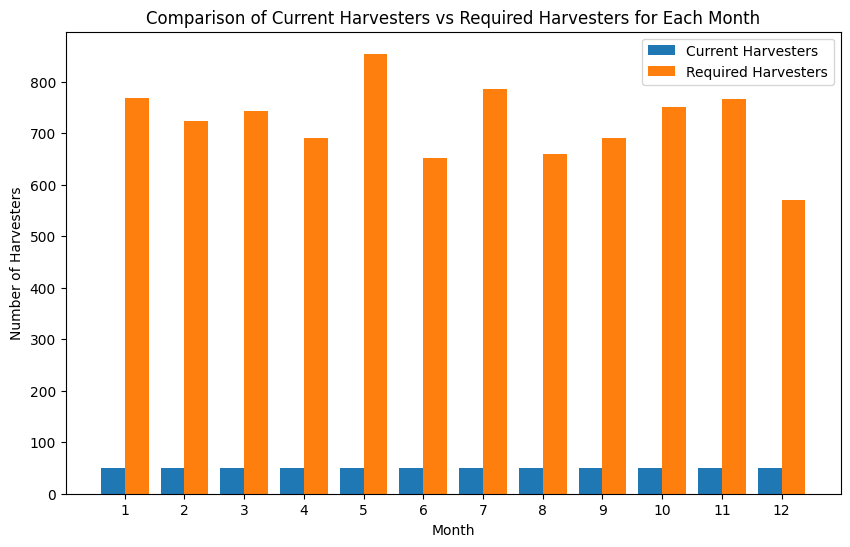

In [ ]:
import matplotlib.pyplot as plt

projected_production['Month'] = pd.to_datetime(projected_production['Week_Number'].astype(str) + '-1-2023', format='%U-%w-%Y').dt.month

monthly_avg_needed = projected_production.groupby('Month')['Employees Needed'].mean().reset_index()

#  bar chart 
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_needed['Month'] - 0.2, [current_harvesters] * len(monthly_avg_needed), width=0.4, label='Current Harvesters')
plt.bar(monthly_avg_needed['Month'] + 0.2, monthly_avg_needed['Employees Needed'], width=0.4, label='Required Harvesters')

plt.xlabel('Month')
plt.ylabel('Number of Harvesters')
plt.title('Comparison of Current Harvesters vs Required Harvesters for Each Month')
plt.xticks(monthly_avg_needed['Month'])
plt.legend()


plt.show()